# Case Turing - Análise de Dados - Insurance Clain
Autor: Caio Vilquer Carvalho

[Dataset link](https://drive.google.com/file/d/1wgUnkmZ1H0ew-uBpQCJUKxrYOQCqyy2q/view)

O objetivo dessa análise inicial é analisar como algumas das 18 primeiras colunas do dataset se comportam indivídualmente e como elas interagem entre si. Após, analisar como algumas features podem estar relacionadas com o resultado da reclamação de seguro

### Descrição do dataset:
- **ID**: Identificação única para cada registro de sinistro de seguro.

- **AGE**: Faixa etária do segurado (ex.: 16-25, 26-39, 40-64, 65+).

- **GENDER**: Gênero do segurado (ex.: masculino, feminino).

- **RACE**: Raça do segurado (ex.: maioria, minoria).

- **DRIVING_EXPERIENCE**: Experiência de condução do segurado em anos (ex.: 0-9 anos, 10-19 anos, 20-29 anos, 30+ anos).

- **EDUCATION**: Nível de educação do segurado (ex.: nenhum, ensino médio, universidade).

- **INCOME**: Classe de renda do segurado (ex.: pobreza, classe trabalhadora, classe média, classe alta).

- **CREDIT_SCORE**: Pontuação de crédito do segurado, variando de 0 a 1.

- **VEHICLE_OWNERSHIP**: Indica se o segurado possui um veículo (sim ou não).

- **VEHICLE_YEAR**: Ano de fabricação do veículo (ex.: antes de 2015, depois de 2015).

- **MARRIED**: Indica se o segurado é casado (sim ou não).

- **CHILDREN**: Indica se o segurado tem filhos (sim ou não).

- **LOCALITY**: Localidade onde o segurado reside (ex.: Nova York, Miami, São Francisco, Baltimore).

- **ANNUAL_MILEAGE**: Quilometragem anual do veículo do segurado.

- **VEHICLE_TYPE**: Tipo de veículo do segurado (ex.: sedan, carro esportivo).

- **SPEEDING_VIOLATIONS**: Número de infrações por excesso de velocidade do segurado.

- **DUIS**: Número de infrações por dirigir sob influência de álcool ou drogas do segurado.

- **PAST_ACCIDENTS**: Número de acidentes anteriores do segurado.

- **OUTCOME**: Resultado do pedido de sinistro (aprovado ou negado).


## Configuração do ambiente
Os pacotes utilizados para essa análise são:

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leitura do dataset:

In [142]:
url = "https://drive.google.com/uc?id=1wgUnkmZ1H0ew-uBpQCJUKxrYOQCqyy2q"
insurance = pd.read_csv(url)

## Primeiras observações acerca da consistência dos dados

Para saber como o dataset está estruturado usamos os métodos .head(), .tail(), .info() e .describre().

In [143]:
insurance.head(10) # Mostra as 10 primeiras linhas do dataset

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,yes,after 2015,no,yes,New York,12000.0,sedan,0,0,0,approved
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,no,before 2015,no,no,New York,16000.0,sedan,0,0,0,denied
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,yes,before 2015,no,no,New York,11000.0,sedan,0,0,0,approved
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0,0,approved
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,yes,before 2015,no,no,Miami,12000.0,sedan,2,0,1,denied
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,yes,after 2015,no,yes,New York,13000.0,sedan,3,0,3,approved
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,no,after 2015,yes,yes,New York,13000.0,sedan,7,0,3,approved
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,no,after 2015,no,yes,New York,14000.0,sedan,0,0,0,denied
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,no,before 2015,yes,no,New York,13000.0,sedan,0,0,0,approved
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0,0,denied


In [144]:
insurance.tail(10) # Mostra as 5 últimas linhas do dataset

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9990,302403,16-25,female,majority,0-9y,high school,working class,0.502120,yes,before 2015,no,yes,Miami,10000.000000,sedan,0,0,0,denied
9991,67445,26-39,male,majority,10-19y,university,upper class,0.705228,yes,after 2015,no,no,New York,15000.000000,sedan,0,0,1,approved
9992,188300,65+,male,majority,10-19y,university,upper class,0.542105,yes,before 2015,yes,yes,New York,8000.000000,sedan,0,0,2,approved
9993,156495,26-39,male,majority,10-19y,university,upper class,0.695466,yes,before 2015,no,yes,New York,11000.000000,sedan,4,1,0,approved
9994,752887,26-39,male,majority,10-19y,high school,middle class,0.454300,yes,before 2015,no,no,New York,16000.000000,sedan,1,0,2,approved
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,yes,before 2015,no,no,New York,16000.000000,sedan,0,0,1,approved
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,yes,after 2015,no,yes,Miami,11697.003207,sedan,1,0,0,approved
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,yes,before 2015,no,yes,New York,14000.000000,sedan,0,0,0,approved
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,no,before 2015,no,yes,New York,13000.000000,sedan,2,0,1,denied
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,yes,before 2015,yes,yes,New York,13000.000000,sedan,0,0,0,approved


In [145]:
insurance.info() # Mostra informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  object 
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  object 
 11  CHILDREN             10000 non-null  object 
 12  LOCALITY             10000 non-null  object 
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

A partir disso é possível entender como os dados serão apresentados em cada campo da tabela.
Além disso, o método .info() permite checar se todos os dados estão tipados de forma correta. No caso dessa tabela, está tudo correto.

In [146]:
insurance.describe().drop(columns=['ID']) # Mostra estatísticas descritivas do dataset

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.515813,11697.003207,1.482900,0.23920,1.056300
std,0.130752,2680.167384,2.241966,0.55499,1.652454
min,0.053358,2000.000000,0.000000,0.00000,0.000000
25%,0.431509,10000.000000,0.000000,0.00000,0.000000
50%,0.515813,11697.003207,0.000000,0.00000,0.000000
75%,0.607607,13000.000000,2.000000,0.00000,2.000000
max,0.960819,22000.000000,22.000000,6.00000,15.000000


Por meio do método .describe() podemos ter uma noção inicial sobre o que esperar dos dados numéricos do dataset. Vemos, por exemplo que grande parte dos analisados não possuem infranções por dirigir sob efeito de substâncias ílicitas.

### Tratamento de possíveis inconsistências

Remoção de possíveis registros duplicados

In [147]:
duplicados = insurance[insurance.duplicated(keep='first')]  # Verifica se há linhas duplicadas
duplicados.shape # Mostra a quantidade de linhas duplicadas

(0, 19)

Como é possível ver, não há registros duplicados que poderiam prejudicar a análise

Remoção de possíveis registros nulos

In [148]:
insurance.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
LOCALITY               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Como não há incosistências aparentes, podemos iniciar a análise.

## Partindo para a análise indivídual dos componetes das features

### Idade

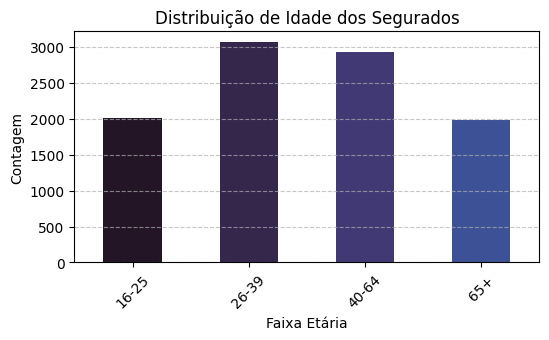

In [149]:
colors = sns.color_palette('mako', 10)
insurance['AGE'].value_counts().sort_index().plot(kind='bar', figsize=(6, 3), color=colors)
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Distribuição de Idade dos Segurados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfco acima, vemos que a maior concetração de idades dos analisados esta entre 26 e 64 anos, entretando os valores estão bem distribuidos, sem extremos.

### Gênero

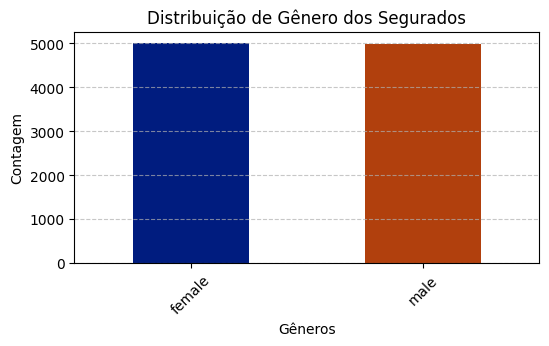

In [150]:
colors = sns.color_palette('dark', 2,)
insurance['GENDER'].value_counts().plot(kind='bar', figsize=(6, 3), color=colors)
plt.xlabel('Gêneros')
plt.ylabel('Contagem')
plt.title('Distribuição de Gênero dos Segurados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Vemos que a distribuição de gêneros está praticamente igualitária, o que irá facilitar análises futuras.

### Etnia

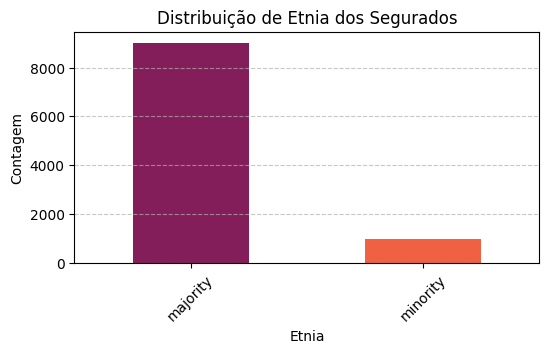

In [151]:
colors = sns.color_palette('rocket', len(insurance['RACE'].unique()))
insurance['RACE'].value_counts().plot(kind='bar', figsize=(6, 3), color=colors)
plt.xlabel('Etnia')
plt.ylabel('Contagem')
plt.title('Distribuição de Etnia dos Segurados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


No gráfico acima, podemos observar a distribuição etnia dos segurados Aqui é possível ver que grande parte dos que podem assinar um seguro para seu carro próprio pertecem a etnias majoritárias, o que reflete um estado de desigualdade.

### Educação

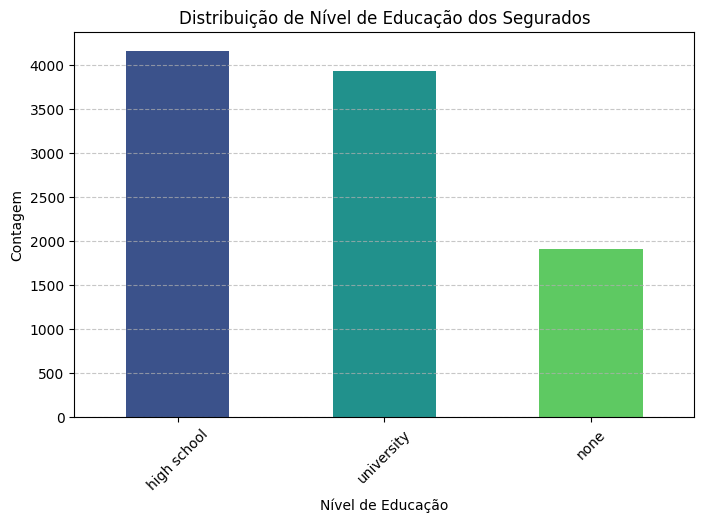

In [152]:
colors = sns.color_palette('viridis', len(insurance['EDUCATION'].unique()))
insurance['EDUCATION'].value_counts().plot(kind='bar', figsize=(8, 5), color=colors)
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.title('Distribuição de Nível de Educação dos Segurados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a distribuição do nível de educação dos segurados. A maioria dos segurados possui ensino médio ou universidade, o que pode indicar que pessoas com maior nível de educação tendem a contratar seguros de veículos. Por outro lado, há uma menor quantidade de segurados sem educação formal, o que pode refletir uma correlação entre nível de educação e a capacidade de adquirir um seguro de veículo. Tal análise pode ser útil para entender o perfil educacional dos segurados e como isso pode influenciar na contratação de seguros.

### Classes sociais

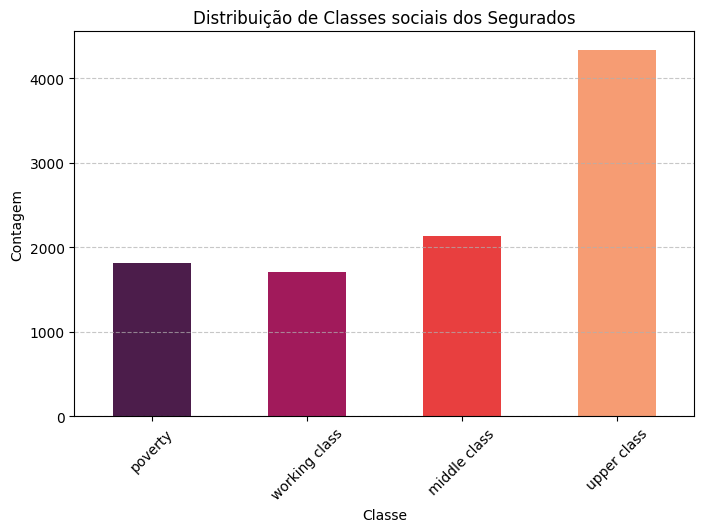

In [153]:
order = ['poverty', 'working class', 'middle class', 'upper class']
colors = sns.color_palette('rocket', len(insurance['INCOME'].unique()))
insurance['INCOME'].value_counts().reindex(order).plot(kind='bar', figsize=(8, 5), color=colors)
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição de Classes sociais dos Segurados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Neste gráfico acima, pode-se ver a distribuição de classes de profissções dos segurados. Nele, tona-se claro que a tendência é que quanto maior a classe da pessoa, maior as chances dela contratar um seguro para seu carro.

### Pontuação de crédito

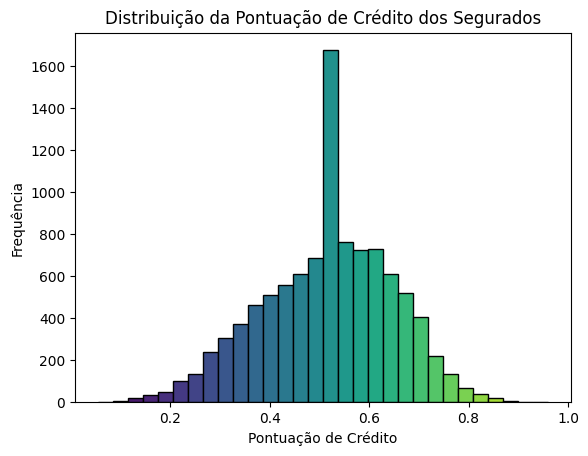

In [154]:

# Criar o histograma
n, bins, patches = plt.hist(insurance['CREDIT_SCORE'], bins=30, edgecolor='black')

# Aplicar gradiente de cor
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(i / len(patches)))

# Adicionar título e rótulos
plt.title('Distribuição da Pontuação de Crédito dos Segurados')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Frequência')
plt.show()


No histograma acima, podemos observar a distribuição da pontuação de crédito dos segurados. A pontuação de crédito varia de 0 a 1, e a maioria dos segurados possui uma pontuação de crédito entre 0.2 e 0.8. A maior concentração de segurados está na faixa de pontuação de crédito entre 0.2 e 0.8, com um pico significativo em torno de 0.5. Isso indica que a maioria dos segurados possui uma pontuação de crédito moderada a boa.

## Análise das relações entre as features

A partir do mapa de calor a seguir podemos ter uma noção entre correlações entre as features e poderemos escolher com maior acurácia o que pode ser interessante de análisar

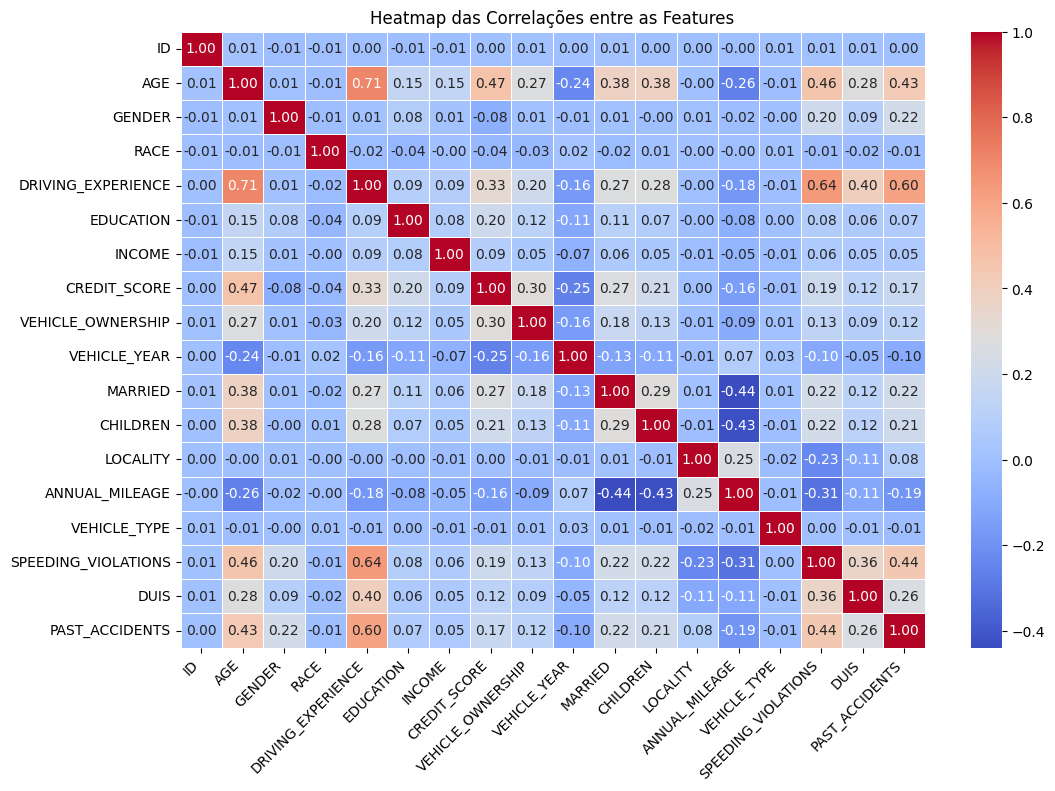

In [155]:
insurance_numeric = insurance.copy()

# Mapeamento para a coluna AGE
age_mapping = {'16-25': 1, '26-39': 2, '40-64': 3, '65+': 4}
insurance_numeric['AGE'] = insurance_numeric['AGE'].map(age_mapping)

# Mapeamento para outras colunas categóricas
categorical_columns = ['GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'LOCALITY', 'VEHICLE_TYPE', 'OUTCOME']
for column in categorical_columns:
    insurance_numeric[column] = insurance_numeric[column].astype('category').cat.codes

# Retirar a coluna OUTCOME
correlation_matrix = insurance_numeric.drop(columns=['OUTCOME']).corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap das Correlações entre as Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

A partir do heatmap gerado, podemos observar algumas correlações interessantes entre as features do dataset. Aqui estão algumas observações importantes:

1. **Localidade e Violações por Excesso de Velocidade**: Existe uma correlação negativa (-0.23) entre localidade e violações por excesso de velocidade, o que pode indicar que existem regiões com maior número de violações.

2. **Gênero e Acidentes Passados**: Existe uma correlação positiva (0.22) entre gênero e acidentes passados, sugerindo que há uma diferença na quantidade de acidentes entre homens e mulheres.

3. **Educação e Pontuação de Crédito**: Existe uma correlação positiva (0.20) entre educação e pontuação de crédito, indicando que segurados com maior nível de educação tendem a ter uma pontuação de crédito melhor.

4. **Idade e Pontuação de Crédito**: Existe uma correlação positiva (0.47) entre a idade e a pontuação de crédito. Isso pode indicar que segurados mais velhos tendem a ter uma pontuação de crédito melhor.

5. **Pontuação de Crédito e Casamento**: Existe uma correlação positiva (0.27) entre a pontuação de crédito e o estado civil (casado), sugerindo que segurados casados tendem a ter uma pontuação de crédito melhor.

6. **Violações por Excesso de Velocidade e Acidentes Anteriores**: Existe uma correlação positiva (0.44) entre as violações por excesso de velocidade e os acidentes anteriores, sugerindo que motoristas que cometem mais infrações de velocidade também tendem a ter mais acidentes.

7. **Quilometragem anual do veículo e estado civil**: Existe uma correlação negativa (-0.44) entre a quilometragem anual do veículo do segurado e o estado civil (casado), sugerindo que segurados casados tendem a dirigir menos anualmente em comparação com segurados não casados.

Algumas dessas observações serão abordadas a seguir.

### Localidade e Violações por Excesso de Velocidade

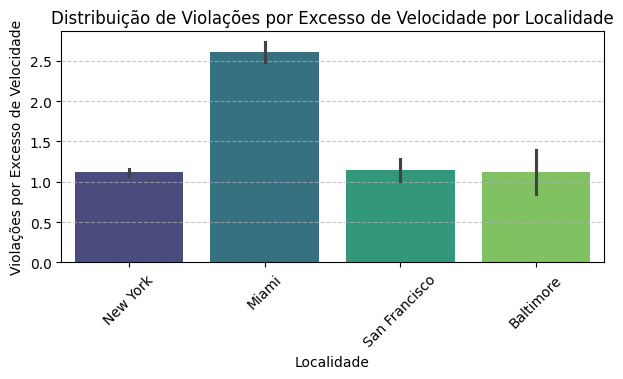

In [ ]:
plt.figure(figsize=(7, 3))
sns.barplot(x='LOCALITY', y='SPEEDING_VIOLATIONS',hue='LOCALITY', data=insurance, palette='viridis')
plt.xlabel('Localidade')
plt.ylabel('Violações por Excesso de Velocidade')
plt.title('Distribuição de Violações por Excesso de Velocidade por Localidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a distribuição de violações por excesso de velocidade por localidade. É evidente que há uma variação significativa entre a cidade de Miami e as outra localidades. O que pode indicar uma tendência de comportamento de direção mais agressiva. Essa análise pode ser útil para identificar áreas que necessitam de maior atenção em termos de políticas de segurança no trânsito e fiscalização.

### Gênero e Acidentes Passados

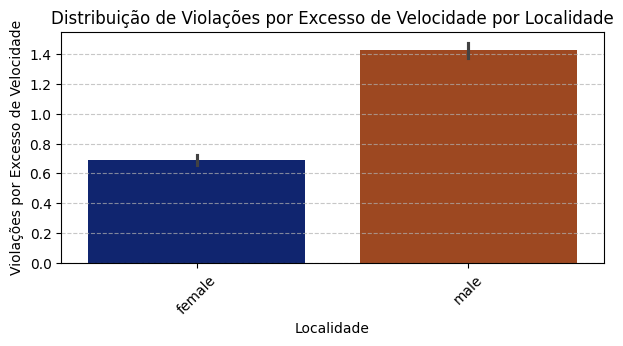

In [209]:
plt.figure(figsize=(7, 3))
sns.barplot(x='GENDER', y='PAST_ACCIDENTS',hue='GENDER', data=insurance, palette='dark')
plt.xlabel('Localidade')
plt.ylabel('Violações por Excesso de Velocidade')
plt.title('Distribuição de Violações por Excesso de Velocidade por Localidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Com o gráfico acima, podemos observar a distribuição de gêneros por acidentes no passado. Por meio dele, fica evidente que ocorrem mais acidades com o homens do que com as mulheres. Tal fato pode ser o reflexo de uma possível direção sem tanta atenção por parte dos homens.

### Educação e Pontuação de Crédito

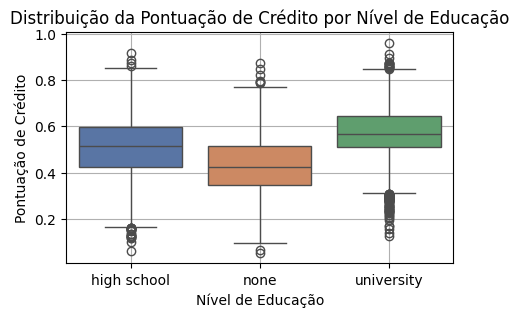

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='EDUCATION', y='CREDIT_SCORE', hue = 'EDUCATION' ,data=insurance, palette='deep')
plt.xlabel('Nível de Educação')
plt.ylabel('Pontuação de Crédito')
plt.title('Distribuição da Pontuação de Crédito por Nível de Educação')
plt.grid(True)
plt.show()


No gráfico acima, pode-se observar a distribuição da pontuação de crédito por nível de educação dos segurados. Este gráfico revela que segurados que possuem maior nível de educação tendem a ter uma pontuação de crédito mais elevada. Tal situação pode ser explicada pelo fato de que pessoas com maior nível de educação geralmente têm melhores oportunidades de emprego, logo uma situação financeira mais estável, o que refletirá em uma melhor pontuação de crédito.

### Pontuação de Crédito e Casamento


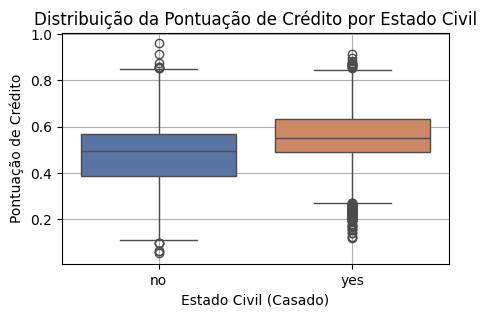

In [159]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='MARRIED', y='CREDIT_SCORE', hue='MARRIED', data=insurance, palette='deep')
plt.xlabel('Estado Civil (Casado)')
plt.ylabel('Pontuação de Crédito')
plt.title('Distribuição da Pontuação de Crédito por Estado Civil')
plt.grid(True)
plt.show()

Este gráfico revela que segurados casados tendem a ter uma pontuação de crédito mais elevada em comparação com segurados não casados. Essa situação pode ser explicada pelo fato de que segurados casados podem ter uma maior responsabilidade financeira, pois as decições com o dinheiro são tomadas por duas pessoas ao invés de uma, o que pode contribuir para uma melhor gestão do crédito.

### Distância em milhas anual do veículo e estado civil

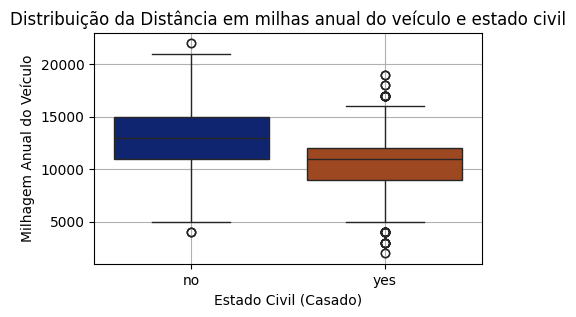

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxpbaltimore()

No gráfico acima, podemos observar a distribuição da distância em milhas anual do veículo por estado civil. Este gráfico revela que segurados casados tendem a dirigir menos anualmente em comparação com segurados não casados. Essa situação pode ser explicada pelo fato de que pessoas casadas podem ter mais responsabilidades familiares e, portanto, menos tempo para dirigir longas distâncias. Tal análise pode ser útil para entender como o estado civil influencia o comportamento de direção dos segurados.

### Escolaridade, Renda e Posse do veículo

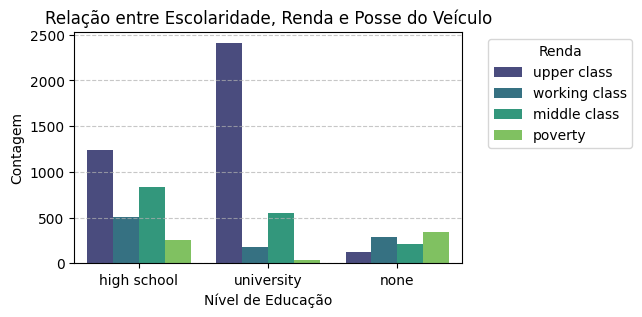

In [161]:
# Filtrar o dataframe para incluir apenas as pessoas que possuem a posse do veículo
insurance_posse = insurance[insurance['VEHICLE_OWNERSHIP'] == 'yes']

plt.figure(figsize=(5, 3))
sns.countplot(x='EDUCATION', hue='INCOME', data=insurance_posse, palette='viridis', dodge=True)
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.title('Relação entre Escolaridade, Renda e Posse do Veículo')
plt.legend(title='Renda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A partir do gráfico acima, podemos observar a relação entre escolaridade, renda e posse do veículo. A análise revela que:

1. **Educação e classe alta**: A esmagadora maioria dos que possuem graduação fazem parte da classe alta, o que revela que melhores oportunidades são dadas aos com maior nível de escolaridade
 
2. **Posse do Veículo**: A posse do veículo é extremamente mais comum entre segurados com maior nível de educação e renda. Isso pode ser explicado pelo fato de que pessoas com maior renda têm mais recursos para adquirir e manter um veículo. 

## Análise do Outcome (Resultado da solicitação)

Nessa parte, iremos tentar traçar algumas correlações entre algumas features e o resultado da reclamaçao. Para isso, algums gráficos serão plotados e a relação será analisada.

### Distribuição dos resultados do Pedido de Sinistro



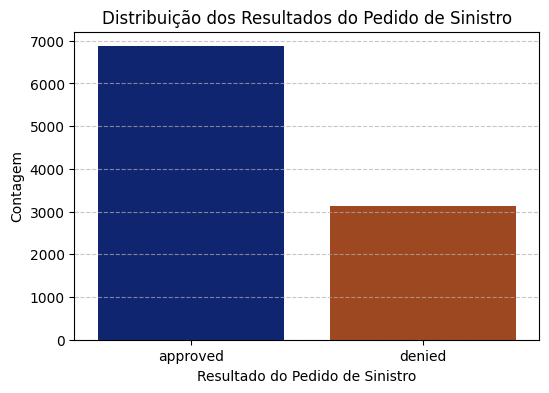

In [162]:
# Plotar o gráfico de distribuição dos resultados do pedido de sinistro
plt.figure(figsize=(6, 4))
sns.countplot(x='OUTCOME',  hue = 'OUTCOME',  data=insurance, palette='dark')
plt.xlabel('Resultado do Pedido de Sinistro')
plt.ylabel('Contagem')
plt.title('Distribuição dos Resultados do Pedido de Sinistro')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como podemos ver pelo gráfico, cerca de dois terços dos pedidos são aprovados.

### Como a Experiência na direção e a idade impacta no resuldado

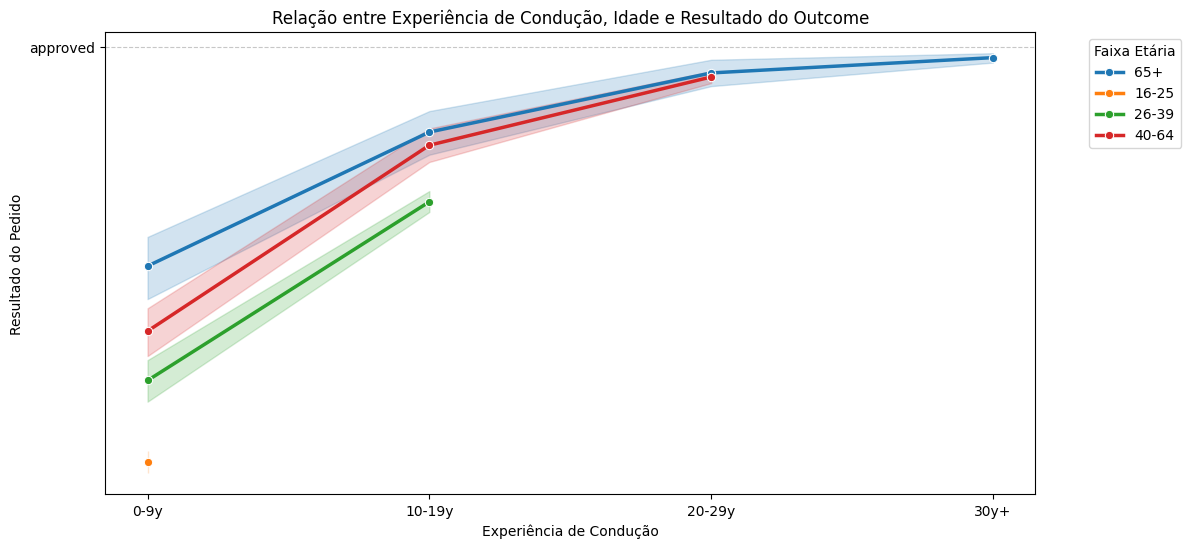

In [187]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DRIVING_EXPERIENCE', y='OUTCOME', hue='AGE', data=insurance, palette='tab10', marker='o', linewidth=2.5)
plt.xlabel('Experiência de Condução')
plt.ylabel('Resultado do Pedido')
plt.title('Relação entre Experiência de Condução, Idade e Resultado do Outcome')
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a relação entre a experiência de condução, a idade e o resultado da reclamação. A análise revela que:

1. **Mais jovens**: Para os segurados mais jovens (16-25 anos), a maioria das reclamações são negadas. Isso pode ser devido à falta de experiência e maior propensão a acidentes.

2. **Mais velhos**: Nota-se que, como experado, quanto maior a idade do segurado, maior a chance de ele ter maior experiencia de condução.

3. **Mais experientes**: É notório que para segurados com maior experiência dirigindo, maior será a probabilidade de seu pedido ser aceito.

### Como a Posse do veículo e a escolaridade afetam o resultado


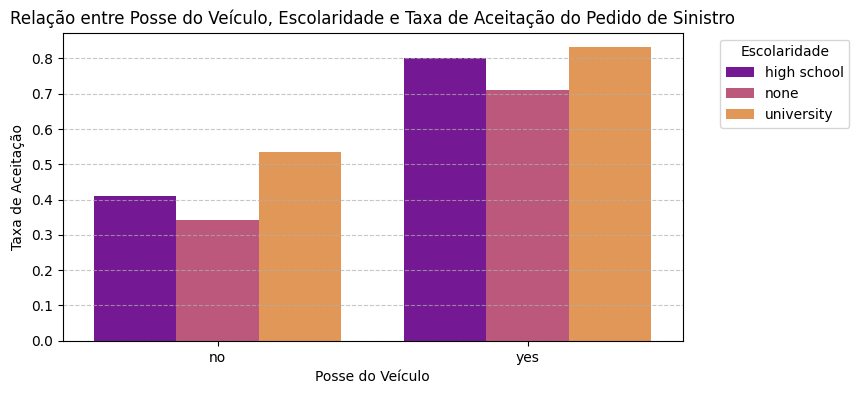

In [189]:
# Transformar o campo OUTCOME em uma taxa de aceitação
insurance['ACCEPTANCE_RATE'] = insurance['OUTCOME'].apply(lambda x: 1 if x == 'approved' else 0)

# Agrupar por VEHICLE_OWNERSHIP, EDUCATION e calcular a taxa de aceitação média
acceptance_rate = insurance.groupby(['VEHICLE_OWNERSHIP', 'EDUCATION'])['ACCEPTANCE_RATE'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x='VEHICLE_OWNERSHIP', y='ACCEPTANCE_RATE', hue='EDUCATION', data=acceptance_rate, palette='plasma')
plt.xlabel('Posse do Veículo')
plt.ylabel('Taxa de Aceitação')
plt.title('Relação entre Posse do Veículo, Escolaridade e Taxa de Aceitação do Pedido de Sinistro')
plt.legend(title='Escolaridade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a relação entre a posse do veículo, o nível de escolaridade e a taxa de aceitação do pedido de reclamação. É possível inferir que:

1. **Posse do Veículo**: Os segurados que possuem um veículo têm uma taxa de aceitação significativamente maior em comparação com aqueles que não possuem um veículo. Isso pode ser explicado pelo fato de que a posse do veículo pode indicar maior responsabilidade e cuidado com o veículo, o que pode resultar em menor risco para a seguradora.

2. **Interação entre Posse do Veículo e Escolaridade**: Percebe-se que em ambos os casos, pessoas com menor nível de escolaridade possuem menos chances de terem seus pedidos aceitos. Algo que talvez tenha ligação com politicas internas da seguradora.

### É possível inferir algo acerca de acidentes passados e o resultado do pedido?

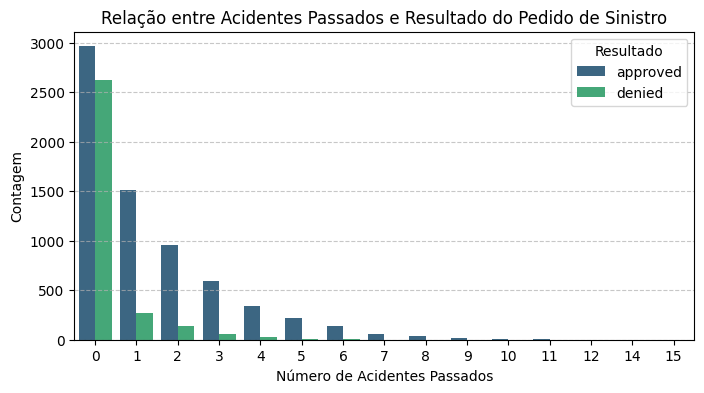

In [188]:
plt.figure(figsize=(8, 4))
sns.countplot(x='PAST_ACCIDENTS', hue='OUTCOME', data=insurance, palette='viridis')
plt.xlabel('Número de Acidentes Passados')
plt.ylabel('Contagem')
plt.title('Relação entre Acidentes Passados e Resultado do Pedido de Sinistro')
plt.legend(title='Resultado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a relação entre o número de acidentes passados e o resultado do pedido de sinistro. A análise revela que segurados com mais acidentes passados têm maior probabilidade de ter suas reclamações aprovadas. Isso pode parecer contra-intuitivo, pois normalmente esperaríamos que um histórico de acidentes aumentasse o risco percebido pela seguradora e, portanto, resultasse em uma maior taxa de negação de sinistros. Entretando, um maior número de acidentes pode ser relacionado apenas ao grande tempo de experiência do motorista, assim, não é um bom parametro para considerar um possível resultado.


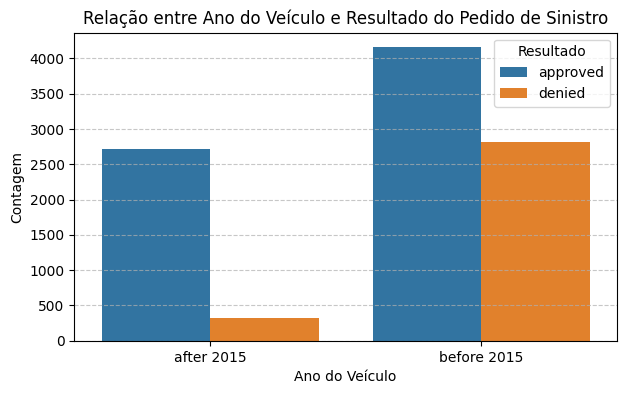

In [192]:
plt.figure(figsize=(7, 4))
sns.countplot(x='VEHICLE_YEAR', hue='OUTCOME', data=insurance, palette='tab10')
plt.xlabel('Ano do Veículo')
plt.ylabel('Contagem')
plt.title('Relação entre Ano do Veículo e Resultado do Pedido de Sinistro')
plt.legend(title='Resultado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A análise do gráfico acima revela que:

1. **Veículos mais antigos**: Os solicitantes com veículos fabricados antes de 2015 têm uma maior quantidade de pedidos de sinistro, tanto aprovados quanto negados. Tal situação pode ser explicada pelo fato de que veículos mais antigos são mais propensos a falhas mecânicas, o que pode aumentar a frequência de pedidos de sinistro.

2. **Veículos mais novos**: Segurados com veículos fabricados após 2015 têm uma menor quantidade de pedidos de sinistro. Isso pode ser devido ao fato de que veículos mais novos são mais confiáveis e têm menos probabilidade de falhas mecânicas, resultando em menos pedidos de sinistro. Além disso, apenas uma baixissima quantidade de pedidos para esse tipo de veículos são negados.

3. **Taxa de aprovação**: A taxa de aprovação dos pedidos de sinistro é relativamente alta para ambos os grupos de veículos, mas é extremamente maior para veículos mais novos. Isso pode indicar que seguradoras têm mais confiança em veículos mais novos.


### Relação entre gênero e o resultado da solicitação


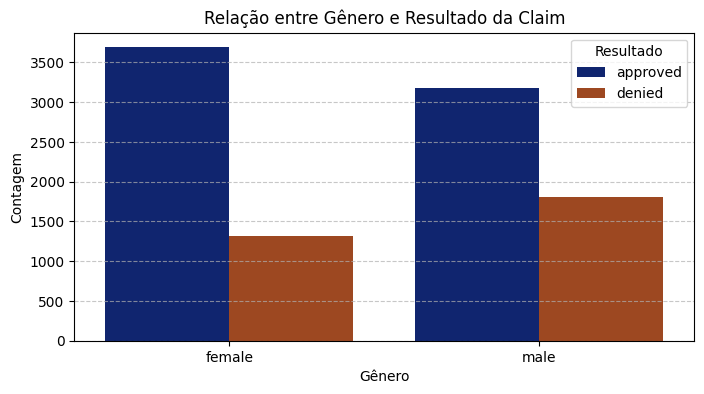

In [197]:
plt.figure(figsize=(8, 4))
sns.countplot(x='GENDER', hue='OUTCOME', data=insurance, palette='dark')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Relação entre Gênero e Resultado da Claim')
plt.legend(title='Resultado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como esperado deste gráfico, mulheres tendem a receber maior aprovação do pedido de sinistro do que os homens. Essa relação foi premeditada anteriormente na análise que indicou que homens passam por mais acidentes de trânsito do que as mulheres. Tal fato pode indicar para a seguradora que as mulheres tem a tendência de usar menos o seguro e, portanto, devem ter maior prioridade para aprovação da solicitação.

### Pontuação de Crédito e aprovação do pedido

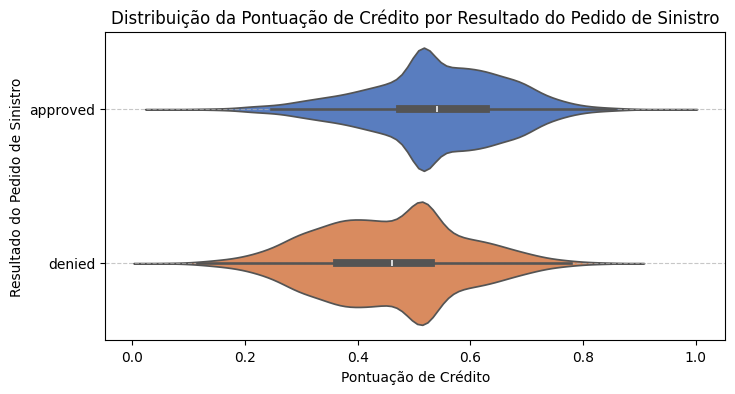

In [203]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='CREDIT_SCORE', y='OUTCOME', hue = 'OUTCOME', data=insurance, palette='muted')
plt.ylabel('Resultado do Pedido de Sinistro')
plt.xlabel('Pontuação de Crédito')
plt.title('Distribuição da Pontuação de Crédito por Resultado do Pedido de Sinistro')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a distribuição da pontuação de crédito por resultado do pedido de sinistro. A análise revela que segurados com pontuação de crédito mais alta, isto é, acima da média de 0.5 tendem a ter uma maior taxa de aprovação de seus pedidos de sinistro. Isso pode ser explicado pelo fato de que uma pontuação de crédito mais alta geralmente indica um histórico financeiro mais estável e confiável, o que reduz o risco percebido pela seguradora.

### Estado civil e o resultado da reclamação

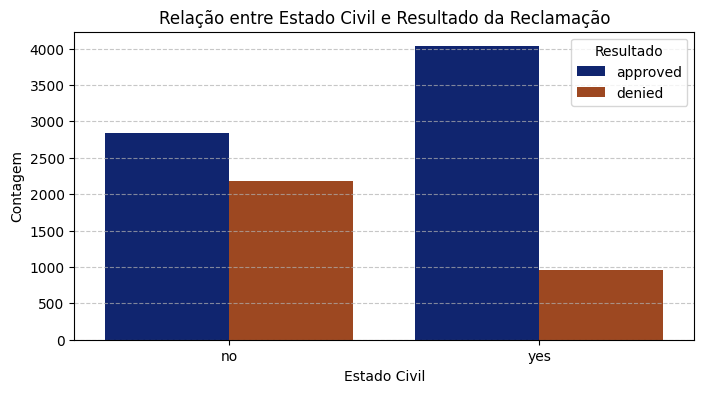

In [198]:
plt.figure(figsize=(8, 4))
sns.countplot(x='MARRIED', hue='OUTCOME', data=insurance, palette='dark')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.title('Relação entre Estado Civil e Resultado da Reclamação')
plt.legend(title='Resultado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a relação entre o estado civil e o resultado da reclamação. Podemos afirmar que segurados casados têm uma taxa de aceitação significativamente maior em comparação com segurados não casados. Tal resultado já havia sido premeditado na análise entre pontuação de crédito e estado civil, na qual foi observado que segurados casados tendem a ter uma pontuação de crédito mais elevada.

### Qual a relação entre a localidade do segurado e o resultado de sua reclamação?

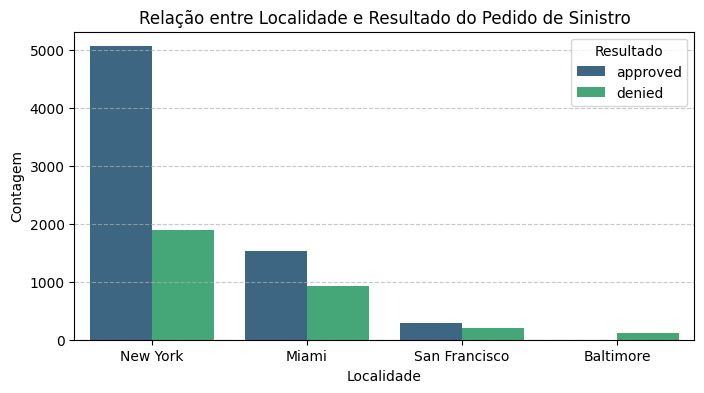

In [204]:
plt.figure(figsize=(8, 4))
sns.countplot(x='LOCALITY', hue='OUTCOME', data=insurance, palette='viridis')
plt.xlabel('Localidade')
plt.ylabel('Contagem')
plt.title('Relação entre Localidade e Resultado do Pedido de Sinistro')
plt.legend(title='Resultado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No gráfico acima, podemos observar a relação entre a localidade e o resultado do pedido de sinistro. A análise revela que:

1. **New York**: A cidade de New York naturalmente deveria possuir maior número total de requisições, visto que sua população é mais de 10 vezes maior que a das outras cidades.

2. **Miami**: Apesar de ser a menor cidade da lista, ela apresenta o segundo maior numero de requisições. Tal fato pode ajudar a corroborar a hipótese levantada anteriormente de que os moradores da cidade apresentam uma tendência de comportamento de direção mais agressiva. Talvez por isso a cidade apresente uma  menor taxa de aceitação de reclamação do que a de New York.